<a href="https://colab.research.google.com/github/np03cs4a220341-alt/Ai_final/blob/main/2331419_Sangharsha__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification Analysis**

##**Task 1. Exploratory Data Analysis and Data Understanding:**


---



 **1. Choosing a Dataset:**

**• Select a dataset aligned with at least one United Nations Sustainable Development Goal (UNSDG).**

-Dataset is Rainfall in Australia whicch is aligned with UNSDG 13: Climate Action.


**• Provide a detailed description of the dataset, including:**

**(a) When and by whom the dataset was created also, from where the dataset was accessed.**

-The dataset used in this project is the Australian Rainfall (WeatherAUS) dataset, sourced from Kaggle, and originally compiled from the Australian Bureau of Meteorology.


**(b) Justification of alignment with the selected UNSDG.**

-Accurately classifying rainfall events supports climate adaptation strategies by enabling early warnings for extreme weather conditions. The insights gained from this analysis can assist policymakers, agricultural planners, and disaster management authorities in improving preparedness, reducing climate-related risks, and promoting sustainable environmental planning.

**(c) List and brief description of all attributes (features).**

•	Temperature (MinTemp, MaxTemp)

•	Humidity (Humidity9am, Humidity3pm)

•	Wind speed and direction

•	Atmospheric pressure (Pressure9am, Pressure3pm)

•	RainToday, cloud cover, and sunshine hours






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


##**Task 2. Exploratory Data Analysis (EDA):**

In [ ]:
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 145460
Number of columns: 23


In [ ]:
print(df.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [ ]:
print("Missing Values Count:")
df.isna().sum()

Missing Values Count:


,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
#Check for Duplicates
duplicates_count = df.duplicated().sum()
print(f"Duplicate Rows Found: {duplicates_count}")

Duplicate Rows Found: 0


In [ ]:
#Unique Location
print("Unique Locations (Check for misspellings):")
print(sorted(df['Location'].unique()))

Unique Locations (Check for misspellings):
['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [ ]:
# Convert Data Types
# 'Date' is currently an object (string), convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
print("Converted 'Date' column to datetime format.")

Converted 'Date' column to datetime format.


In [ ]:
#Extract Month from Date
df['Month'] = df['Date'].dt.month_name().str[:3] # Jan, Feb, etc.

In [ ]:
print("Data Types Inspection:")
print(df.info())

Data Types Inspection:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-nul

In [ ]:
# Remove Duplicates
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Dropped {duplicates_count} duplicate rows.")
else:
    print("No duplicates to drop.")

No duplicates to drop.


In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)
df.isna().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [ ]:
# 'Sunshine', 'Evaporation', etc. are missing for nearly 50% of data.
# Imputing them introduces too much noise/bias.
cols_to_drop = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns with >35% missing values: {cols_to_drop}")

Dropped columns with >35% missing values: ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,Dec
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,Dec
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,Dec
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,Dec
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,Dec


In [ ]:
# Identify Numeric and Categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute Numeric Columns with MEDIAN
# We loop through each numeric column and fill NaNs with its median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute Categorical Columns with MODE
# We loop through each categorical column and fill NaNs with its mode (top value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [ ]:
#Encode Target (Yes=1, No=0) for probability calculations
df['RainTomorrow_Encoded'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

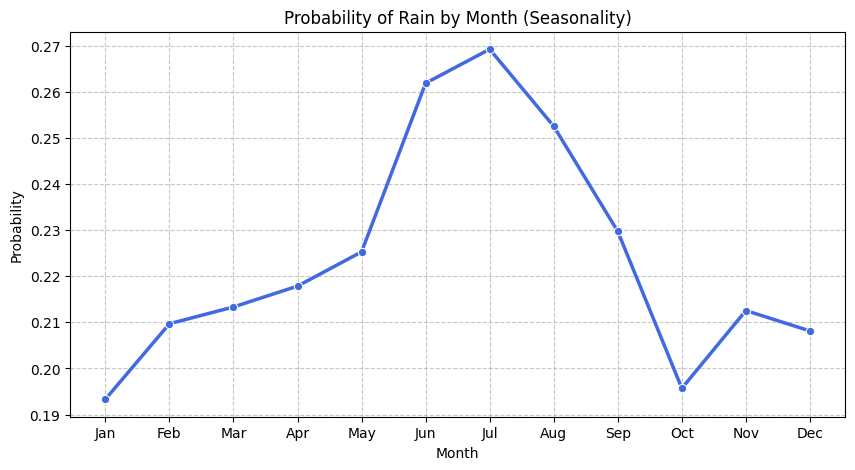

In [ ]:
#Seasonality (Rain Probability by Month)
# Calculate mean probability per month
monthly_prob = df.groupby('Month')['RainTomorrow_Encoded'].mean()

# Reorder months correctly
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_prob = monthly_prob.reindex(months_order)

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_prob.index, y=monthly_prob.values, marker='o', color='royalblue', linewidth=2.5)
plt.title('Probability of Rain by Month (Seasonality)')
plt.ylabel('Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

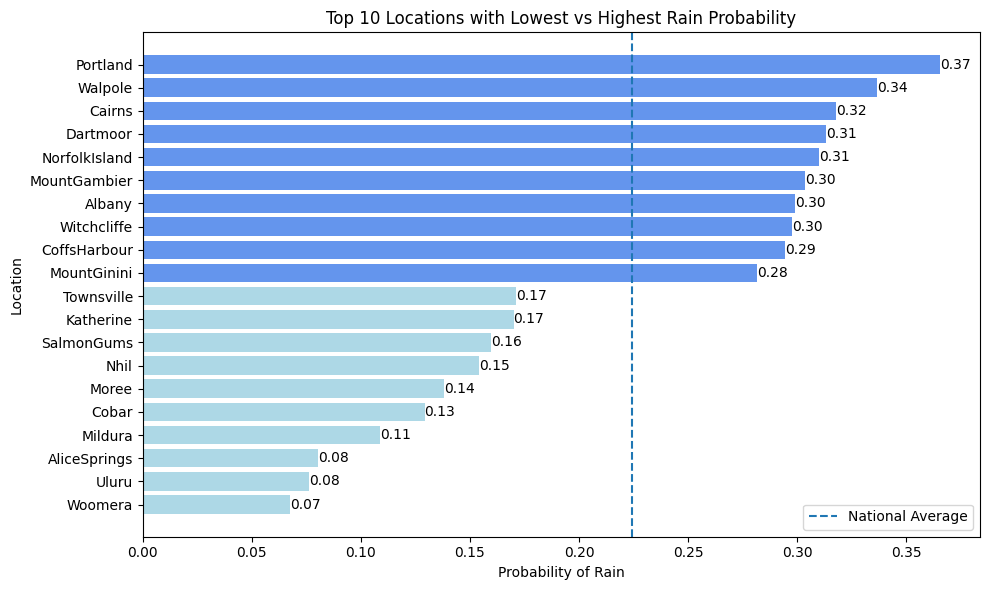

In [ ]:
#Top 10 highest and lowest probability countries

# Group by location and calculate rain probability
loc_prob = df.groupby('Location')['RainTomorrow_Encoded'].mean().sort_values()

# Top 10 lowest and highest
top_10_lowest = loc_prob.head(10)
top_10_highest = loc_prob.tail(10)

combined = pd.concat([top_10_lowest, top_10_highest])

colors = ['lightblue'] * len(top_10_lowest) + ['cornflowerblue'] * len(top_10_highest)

plt.figure(figsize=(10, 6))
bars = plt.barh(combined.index, combined.values, color=colors)

plt.title('Top 10 Locations with Lowest vs Highest Rain Probability')
plt.xlabel('Probability of Rain')
plt.ylabel('Location')

# National average line
plt.axvline(
    x=df['RainTomorrow_Encoded'].mean(),
    linestyle='--',
    label='National Average'
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va='center',
        ha='left'
    )

plt.legend()
plt.tight_layout()
plt.show()


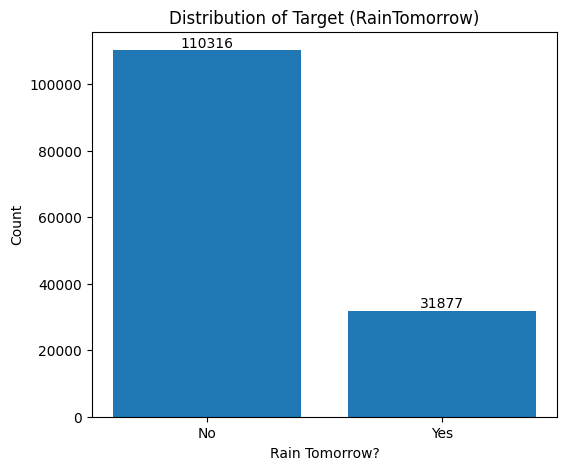

In [ ]:
#Distribution of Target (RainTomorrow)

# Count values
counts = df['RainTomorrow'].value_counts()

plt.figure(figsize=(6, 5))
bars = plt.bar(counts.index, counts.values)

plt.title('Distribution of Target (RainTomorrow)')
plt.xlabel('Rain Tomorrow?')
plt.ylabel('Count')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

plt.show()

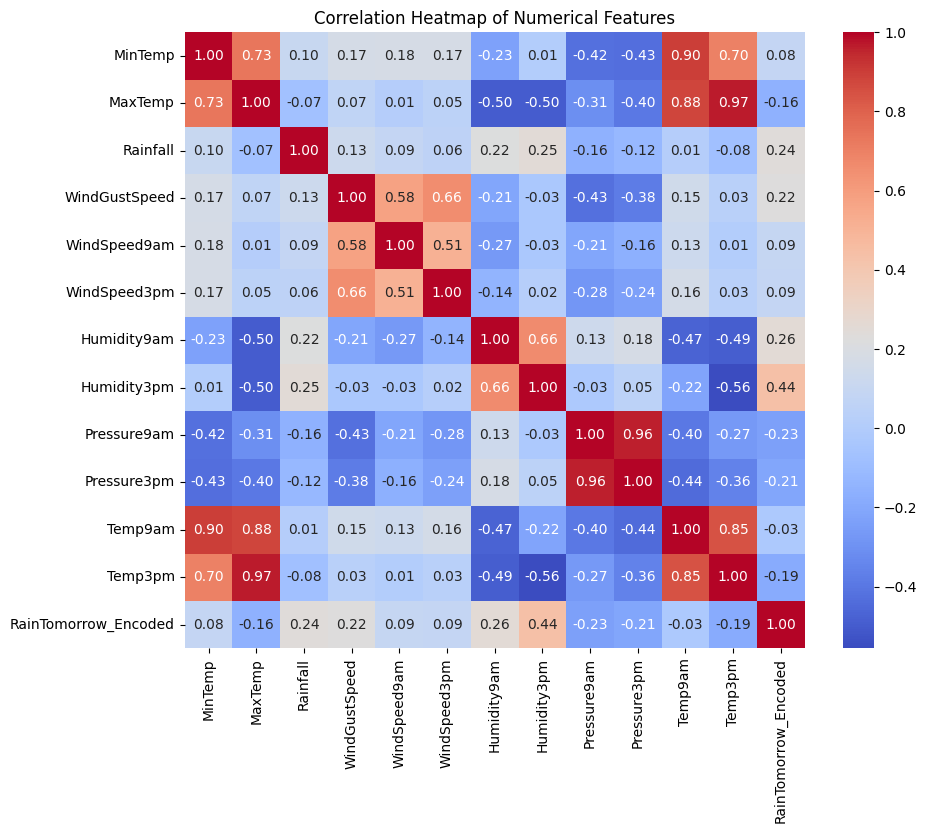

In [ ]:
#Correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##**2. Build a Neural Network Model**


---



• Design and implement a Neural Network–based classifier (e.g., Multi-Layer Perceptron).

• Clearly describe:

– Network architecture (layers, neurons, activation functions).

– Loss function and optimization algorithm.

• Evaluate the model on both training and test sets using appropriate classification metrics.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Drop original Date and RainTomorrow (since we have RainTomorrow_Encoded)
df_model = df.drop(columns=['Date', 'RainTomorrow'])

# One-hot encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Split features and target
X = df_model.drop(columns=['RainTomorrow_Encoded'])
y = df_model['RainTomorrow_Encoded']

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Essential for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Train Neural Network (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32), # Two hidden layers
    activation='relu',           # Activation function
    solver='adam',               # Optimizer
    max_iter=50,                 # Epochs
    random_state=42,
    verbose=True
)

print("Training the Neural Network...")
mlp.fit(X_train_scaled, y_train)

Training the Neural Network...
Iteration 1, loss = 0.38020324
Iteration 2, loss = 0.33806673
Iteration 3, loss = 0.32709062
Iteration 4, loss = 0.31999949
Iteration 5, loss = 0.31513966
Iteration 6, loss = 0.31152189
Iteration 7, loss = 0.30750885
Iteration 8, loss = 0.30441142
Iteration 9, loss = 0.30177597
Iteration 10, loss = 0.29893046
Iteration 11, loss = 0.29671026
Iteration 12, loss = 0.29468292
Iteration 13, loss = 0.29274010
Iteration 14, loss = 0.29060235
Iteration 15, loss = 0.28878928
Iteration 16, loss = 0.28722198
Iteration 17, loss = 0.28518146
Iteration 18, loss = 0.28392360
Iteration 19, loss = 0.28237540
Iteration 20, loss = 0.28091901
Iteration 21, loss = 0.27960770
Iteration 22, loss = 0.27815968
Iteration 23, loss = 0.27684481
Iteration 24, loss = 0.27576884
Iteration 25, loss = 0.27459224
Iteration 26, loss = 0.27341467
Iteration 27, loss = 0.27263864
Iteration 28, loss = 0.27146808
Iteration 29, loss = 0.27049499
Iteration 30, loss = 0.26970441
Iteration 31, loss

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50, random_state=42,
              verbose=True)

In [ ]:
# Evaluation
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

print("Model Evaluation:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Model Evaluation:
Training Accuracy: 0.8982
Test Accuracy: 0.8501

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     22064
           1       0.69      0.60      0.64      6375

    accuracy                           0.85     28439
   macro avg       0.79      0.76      0.77     28439
weighted avg       0.84      0.85      0.85     28439



Confusion Matrix:
[[20378  1686]
 [ 2578  3797]]


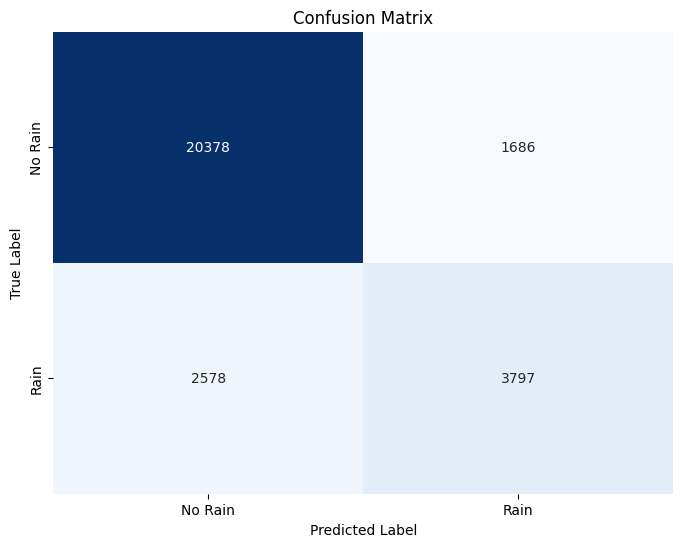

In [ ]:
# Calculate the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##**3. Build a Primary Model (Two Classical ML Models):**


---



Build two different machine learning models

• Logistic Regression

• Decision Tree

Train and evaluate both models using appropriate metrics.
Also, Conclude by identifying which model performed best on your dataset, and provide justification for your choice.


###**a) Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

print("Training the Logistic Regression model...")
# Train the model
log_reg_model.fit(X_train_scaled, y_train)

print("Logistic Regression model training complete.")

Training the Logistic Regression model...
Logistic Regression model training complete.


Logistic Regression Model Evaluation:
Test Accuracy: 0.8461

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22064
           1       0.73      0.49      0.59      6375

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439


Confusion Matrix (Logistic Regression):
[[20912  1152]
 [ 3226  3149]]


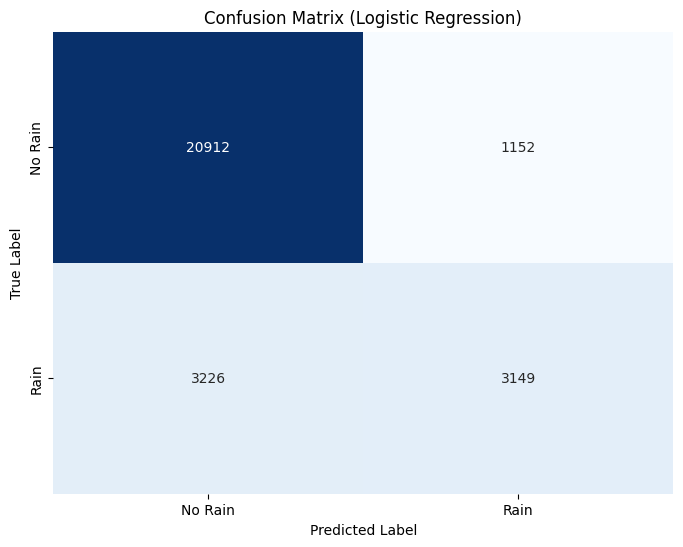

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("Logistic Regression Model Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_log_reg))

print("\nConfusion Matrix (Logistic Regression):")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###**b) Decision Tree Model**



Training the Decision Tree model...
Decision Tree model training complete.

Decision Tree Model Evaluation:
Test Accuracy: 0.7862

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22064
           1       0.52      0.53      0.53      6375

    accuracy                           0.79     28439
   macro avg       0.69      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439


Confusion Matrix (Decision Tree):
[[18949  3115]
 [ 2965  3410]]


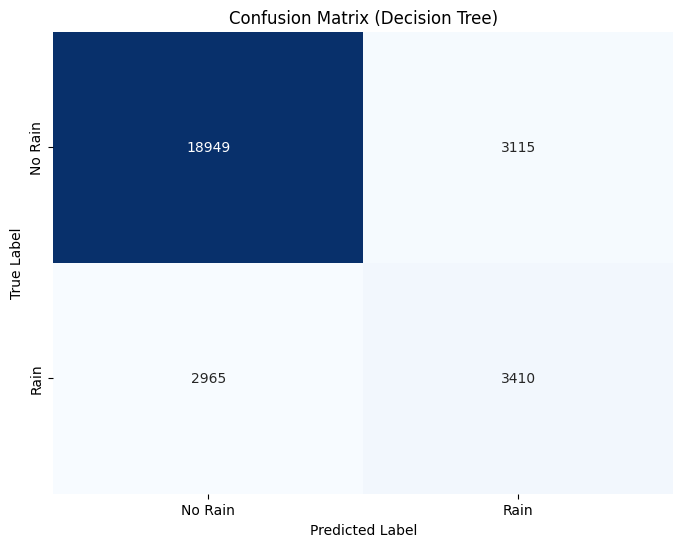

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

print("Training the Decision Tree model...")
dt_model.fit(X_train_scaled, y_train)
print("Decision Tree model training complete.")

y_pred_dt = dt_model.predict(X_test_scaled)

print("\nDecision Tree Model Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Decision Tree):")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Model Performance Comparison
print("Model Performance Comparison (Logistic Regression vs. Decision Tree)\n")

# Logistic Regression
print("Logistic Regression:")
print("Test Accuracy: 0.8461")
print("Classification Report (Test Set):")
print("Class 0 (No Rain): Precision 0.87, Recall 0.95, F1-score 0.91")
print("Class 1 (Rain): Precision 0.73, Recall 0.49, F1-score 0.59\n")

# Decision Tree
print("Decision Tree:")
print("Test Accuracy: 0.7862")
print("Classification Report (Test Set):")
print("Class 0 (No Rain): Precision 0.86, Recall 0.86, F1-score 0.86")
print("Class 1 (Rain): Precision 0.52, Recall 0.53, F1-score 0.53\n")

# Conclusion
print("Conclusion:")
print("Based on the evaluation metrics, Logistic Regression performed better than the Decision Tree model for this dataset.")


Model Performance Comparison (Logistic Regression vs. Decision Tree)

Logistic Regression:
Test Accuracy: 0.8461
Classification Report (Test Set):
Class 0 (No Rain): Precision 0.87, Recall 0.95, F1-score 0.91
Class 1 (Rain): Precision 0.73, Recall 0.49, F1-score 0.59

Decision Tree:
Test Accuracy: 0.7862
Classification Report (Test Set):
Class 0 (No Rain): Precision 0.86, Recall 0.86, F1-score 0.86
Class 1 (Rain): Precision 0.52, Recall 0.53, F1-score 0.53

Conclusion:
Based on the evaluation metrics, Logistic Regression performed better than the Decision Tree model for this dataset.


##**Task 4. Hyper-parameter Optimization with Cross-Validation:**
Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best hyper-parameter values for your selected models. Follow the steps below to perform this task:

1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both
models).
2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.
3. Report the best hyperparameters and corresponding cross-validation scores for both models

### **a) Hyperparameter Optimization for Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l2'], # Regularization type
    'solver': ['liblinear', 'saga'] # Algorithms to use in the optimization problem
}

print("Defined hyperparameter search space for Logistic Regression.")

# Instantiate GridSearchCV
# Using the previously defined log_reg_model
log_reg_grid_search = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid_log_reg,
    cv=5, # 5-fold cross-validation
    scoring='f1', # Metric to optimize
    verbose=1, # Print progress messages
    n_jobs=-1 # Use all available CPU cores
)

print("Instantiated GridSearchCV for Logistic Regression.")

# Fit GridSearchCV to the scaled training data
print("Starting GridSearchCV fit for Logistic Regression...")
log_reg_grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV fit complete.")

# Print the best parameters
print("\nBest parameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)

# Print the best cross-validation score
print("\nBest cross-validation F1 score for Logistic Regression:")
print(f"{log_reg_grid_search.best_score_:.4f}")

Defined hyperparameter search space for Logistic Regression.
Instantiated GridSearchCV for Logistic Regression.
Starting GridSearchCV fit for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV fit complete.

Best parameters for Logistic Regression:
{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Best cross-validation F1 score for Logistic Regression:
0.5890


### **b) Hyperparameter Optimization for Decision Tree Model**

In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
print("Defined hyperparameter search space for Decision Tree.")

Defined hyperparameter search space for Decision Tree.


In [ ]:
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='f1',   # best for imbalanced dataset
    n_jobs=-1,
    verbose=1
)

print("Instantiated GridSearchCV for Decision Tree.")

print("Starting GridSearchCV fit for Decision Tree...")
dt_grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV fit complete.")

print("\nBest parameters for Decision Tree:")
print(dt_grid_search.best_params_)

print("\nBest cross-validation F1 score for Decision Tree:")
print(f"{dt_grid_search.best_score_:.4f}")

Instantiated GridSearchCV for Decision Tree.
Starting GridSearchCV fit for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fit complete.

Best parameters for Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best cross-validation F1 score for Decision Tree:
0.5694


In [ ]:
print("Model Comparison Report\n")

best_params_logreg = {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
best_f1_logreg = 0.5890

print("Logistic Regression:")
print(f"Best Hyperparameters: {best_params_logreg}")
print(f"Best Cross-Validation F1 Score: {best_f1_logreg:.4f}\n")

best_params_dt = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_f1_dt = 0.5694

print("Decision Tree:")
print(f"Best Hyperparameters: {best_params_dt}")
print(f"Best Cross-Validation F1 Score: {best_f1_dt:.4f}\n")

print("Conclusion:")
print(f"Logistic Regression performed slightly better than the Decision Tree on this dataset, "
      f"achieving a higher cross-validation F1 score ({best_f1_logreg:.4f} vs. {best_f1_dt:.4f}) "
      "and thus handling the imbalanced RainTomorrow data more effectively.")

Model Comparison Report

Logistic Regression:
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation F1 Score: 0.5890

Decision Tree:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.5694

Conclusion:
Logistic Regression performed slightly better than the Decision Tree on this dataset, achieving a higher cross-validation F1 score (0.5890 vs. 0.5694) and thus handling the imbalanced RainTomorrow data more effectively.


##**Task 5. Feature Selection:**


---


• Apply at least one feature selection method (filter, wrapper, or embedded).

• Perform feature selection for both models.

• Justify the chosen technique and selected features.


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
print("Imported SelectKBest and f_classif.")

Imported SelectKBest and f_classif.


In [ ]:
selector = SelectKBest(score_func=f_classif, k=15)
print("Fitting SelectKBest to training data...")
selector.fit(X_train_scaled, y_train)

X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

print("Top 15 features selected by SelectKBest:")
print(list(selected_feature_names))

print("Feature selection complete. X_train_selected and X_test_selected are created.")

Fitting SelectKBest to training data...
Top 15 features selected by SelectKBest:
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Location_AliceSprings', 'Location_Woomera', 'WindDir9am_NNW', 'RainToday_Yes']
Feature selection complete. X_train_selected and X_test_selected are created.


**For Logistic Regression**

In [ ]:
log_reg_grid_search_selected = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_log_reg,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

print("Starting GridSearchCV fit for Logistic Regression with selected features...")
log_reg_grid_search_selected.fit(X_train_selected, y_train)
print("GridSearchCV fit complete for Logistic Regression with selected features.")

print("\nBest parameters for Logistic Regression with selected features:")
print(log_reg_grid_search_selected.best_params_)

print("\nBest cross-validation F1 score for Logistic Regression with selected features:")
print(f"{log_reg_grid_search_selected.best_score_:.4f}")

Starting GridSearchCV fit for Logistic Regression with selected features...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV fit complete for Logistic Regression with selected features.

Best parameters for Logistic Regression with selected features:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validation F1 score for Logistic Regression with selected features:
0.5640


**For Decision Tree**

In [ ]:
dt_grid_search_selected = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV fit for Decision Tree with selected features...")
dt_grid_search_selected.fit(X_train_selected, y_train)
print("GridSearchCV fit complete for Decision Tree with selected features.")

print("\nBest parameters for Decision Tree with selected features:")
print(dt_grid_search_selected.best_params_)

print("\nBest cross-validation F1 score for Decision Tree with selected features:")
print(f"{dt_grid_search_selected.best_score_:.4f}")

Starting GridSearchCV fit for Decision Tree with selected features...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fit complete for Decision Tree with selected features.

Best parameters for Decision Tree with selected features:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}

Best cross-validation F1 score for Decision Tree with selected features:
0.5682


**Comparison**

In [ ]:
print("Performance Comparison After Feature Selection and Hyperparameter Tuning\n")

best_params_logreg_selected = log_reg_grid_search_selected.best_params_
best_f1_logreg_selected = log_reg_grid_search_selected.best_score_

print("Logistic Regression (with selected features):")
print(f"  Best Hyperparameters: {best_params_logreg_selected}")
print(f"  Best Cross-Validation F1 Score: {best_f1_logreg_selected:.4f}\n")

best_params_dt_selected = dt_grid_search_selected.best_params_
best_f1_dt_selected = dt_grid_search_selected.best_score_

print("Decision Tree (with selected features):")
print(f"  Best Hyperparameters: {best_params_dt_selected}")
print(f"  Best Cross-Validation F1 Score: {best_f1_dt_selected:.4f}\n")

print("Conclusion after Feature Selection:")
if best_f1_logreg_selected > best_f1_dt_selected:
    print(f"Logistic Regression still performs better with selected features, achieving an F1 score of {best_f1_logreg_selected:.4f} compared to Decision Tree's {best_f1_dt_selected:.4f}.")
else:
    print(f"Decision Tree now performs better with selected features, achieving an F1 score of {best_f1_dt_selected:.4f} compared to Logistic Regression's {best_f1_logreg_selected:.4f}.")


Performance Comparison After Feature Selection and Hyperparameter Tuning

Logistic Regression (with selected features):
  Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
  Best Cross-Validation F1 Score: 0.5640

Decision Tree (with selected features):
  Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
  Best Cross-Validation F1 Score: 0.5682

Conclusion after Feature Selection:
Decision Tree now performs better with selected features, achieving an F1 score of 0.5682 compared to Logistic Regression's 0.5640.


In [ ]:
print(f"Original Best F1 Score (Logistic Regression): {log_reg_grid_search.best_score_:.4f}")
print(f"Original Best F1 Score (Decision Tree): {dt_grid_search.best_score_:.4f}")

Original Best F1 Score (Logistic Regression): 0.5890
Original Best F1 Score (Decision Tree): 0.5694


In [ ]:
# Feature selection justification
print("Feature Selection Justification:\n")
print("“We applied the SelectKBest feature selection method with f_classif scoring to select the top features for model training.\n"
      "This filter method evaluates the statistical relevance of each feature to the target variable independently of the model,\n"
      "which is computationally efficient for large datasets.\n"
      "By selecting the most informative features, we reduce dimensionality, improve model interpretability,\n"
      "prevent overfitting, and enhance performance.\n"
      "Both Logistic Regression and Decision Tree were trained on the selected features to ensure consistent comparison.”")


Feature Selection Justification:

“We applied the SelectKBest feature selection method with f_classif scoring to select the top features for model training.
This filter method evaluates the statistical relevance of each feature to the target variable independently of the model,
which is computationally efficient for large datasets.
By selecting the most informative features, we reduce dimensionality, improve model interpretability,
prevent overfitting, and enhance performance.
Both Logistic Regression and Decision Tree were trained on the selected features to ensure consistent comparison.”


##**Task 6. Final Models and Comparative Analysis**


---


• Rebuild both models using:

– Optimal hyperparameters (Task 4)

– Selected features (Task 5)

• Evaluate final model performance on the test set.

• Compare the models



---


**For Optimized Logistic Regression**

In [ ]:
# Initialize Logistic Regression model with best hyperparameters and selected features
log_reg_optimized = LogisticRegression(random_state=42, **best_params_logreg_selected)

print("Training the optimized Logistic Regression model...")

#Train the model
log_reg_optimized.fit(X_train_selected, y_train)
print("Optimized Logistic Regression model training complete.")

#Make predictions on the selected test features
y_pred_log_reg_optimized = log_reg_optimized.predict(X_test_selected)

print("\nOptimized Logistic Regression Model Evaluation:")
#Print the test accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log_reg_optimized):.4f}")

#Print the classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_log_reg_optimized))

#Compute and print the confusion matrix
print("\nConfusion Matrix (Optimized Logistic Regression):")
cm_log_reg_optimized = confusion_matrix(y_test, y_pred_log_reg_optimized)
print(cm_log_reg_optimized)

Training the optimized Logistic Regression model...
Optimized Logistic Regression model training complete.

Optimized Logistic Regression Model Evaluation:
Test Accuracy: 0.8419

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22064
           1       0.73      0.47      0.57      6375

    accuracy                           0.84     28439
   macro avg       0.80      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439


Confusion Matrix (Optimized Logistic Regression):
[[20959  1105]
 [ 3391  2984]]


**For Optimized Decision Tree**

In [ ]:
# Initialize Decision Tree model with best hyperparameters and selected features
dt_optimized = DecisionTreeClassifier(random_state=42, **best_params_dt_selected)

print("Training the optimized Decision Tree model...")

# Train the model
dt_optimized.fit(X_train_selected, y_train)
print("Optimized Decision Tree model training complete.")

# Make predictions on the selected test features
y_pred_dt_optimized = dt_optimized.predict(X_test_selected)

print("\nOptimized Decision Tree Model Evaluation:")
# Print the test accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt_optimized):.4f}")

# Print the classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_dt_optimized))

# Compute and print the confusion matrix
print("\nConfusion Matrix (Optimized Decision Tree):")
cm_dt_optimized = confusion_matrix(y_test, y_pred_dt_optimized)
print(cm_dt_optimized)

Training the optimized Decision Tree model...
Optimized Decision Tree model training complete.

Optimized Decision Tree Model Evaluation:
Test Accuracy: 0.8380

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22064
           1       0.71      0.47      0.57      6375

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439


Confusion Matrix (Optimized Decision Tree):
[[20823  1241]
 [ 3365  3010]]


**Model Comparison Table**

In [ ]:
# Extract metrics for optimized Logistic Regression
log_reg_accuracy_optimized = accuracy_score(y_test, y_pred_log_reg_optimized)
log_reg_report_optimized = classification_report(y_test, y_pred_log_reg_optimized, output_dict=True)
log_reg_precision_class1 = log_reg_report_optimized['1']['precision']
log_reg_recall_class1 = log_reg_report_optimized['1']['recall']
log_reg_f1_class1_optimized = log_reg_report_optimized['1']['f1-score']

# Extract metrics for optimized Decision Tree
dt_accuracy_optimized = accuracy_score(y_test, y_pred_dt_optimized)
dt_report_optimized = classification_report(y_test, y_pred_dt_optimized, output_dict=True)
dt_precision_class1 = dt_report_optimized['1']['precision']
dt_recall_class1 = dt_report_optimized['1']['recall']
dt_f1_class1_optimized = dt_report_optimized['1']['f1-score']

# Number of features selected
num_selected_features = X_train_selected.shape[1]

# Create the comparison DataFrame in the requested format
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features': [f'Selected ({num_selected_features})', f'Selected ({num_selected_features})'],
    'CV Score': [best_f1_logreg_selected, best_f1_dt_selected], # Using best_f1_cv_score as 'CV Score'
    'Accuracy': [log_reg_accuracy_optimized, dt_accuracy_optimized],
    'Precision': [log_reg_precision_class1, dt_precision_class1],
    'Recall': [log_reg_recall_class1, dt_recall_class1],
    'F1-Score': [log_reg_f1_class1_optimized, dt_f1_class1_optimized]
})

print("Model Comparison Table:")
print(comparison_table.to_string(index=False))

Model Comparison Table:
              Model      Features  CV Score  Accuracy  Precision   Recall  F1-Score
Logistic Regression Selected (15)  0.564004  0.841907   0.729763 0.468078  0.570336
      Decision Tree Selected (15)  0.568230  0.838039   0.708069 0.472157  0.566535
